## :  Previous Script Available

In [106]:
# execute this for the 1st time
# !pip install -r example-requirements.txt

# download file
!wget http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat # linux

# and place in folder data/

--2023-09-18 18:40:48--  http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat
Resolving helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)... 139.82.34.12
Connecting to helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)|139.82.34.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267634147 (255M)
Saving to: ‘data3SS2009.mat.7’

data3SS2009.mat.7   100%[===================>] 255.24M  18.0MB/s    in 15s     

2023-09-18 18:41:04 (16.5 MB/s) - ‘data3SS2009.mat.7’ saved [267634147/267634147]



In [107]:
! pip install statsmodels==0.13.2

In [108]:
import numpy as np
import matplotlib
import scipy
import sklearn
# from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing
import statsmodels
# import tsfresh
import seaborn
import pydot
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.ar_model import AutoReg

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join
import matplotlib.pyplot as plt

In [111]:
fname = join(getcwd(),'data3SS2009.mat')

mat_contents = sio.loadmat(fname)

dataset = mat_contents['dataset']

N, Chno, Nc = dataset.shape
# N: number of samples
# Chno: number of channels
# Nc: number of cases

y = mat_contents['labels'].reshape(Nc)
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [112]:
np.where(y==10)

(array([450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
        463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
        476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
        489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]),)

In [113]:
y_bin_damaged = np.zeros((1,850))
y_bin_damaged[:,450:] = y_bin_damaged[:,450:] +1
y_bin_damaged

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

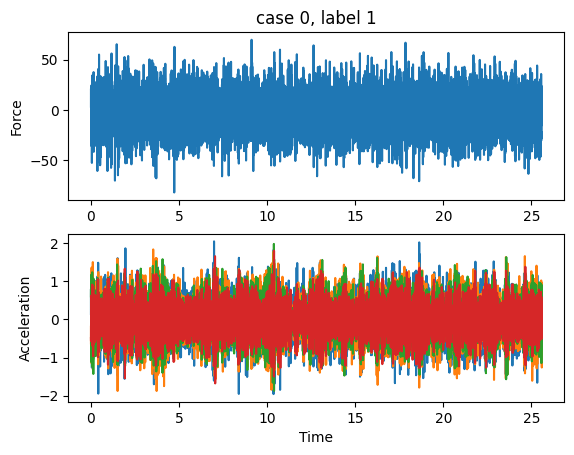

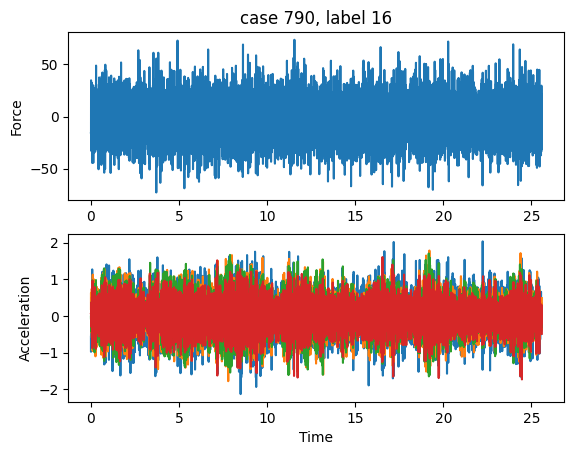

In [114]:
Ch1 = dataset[:,0,:] # célula de carga: força do shaker
Ch2 = dataset[:,1,:] # acelerômetro: base
Ch3 = dataset[:,2,:] # acelerômetro: 1o andar
Ch4 = dataset[:,3,:] # acelerômetro: 2o andar
Ch5 = dataset[:,4,:] # acelerômetro: 3o andar

Ts = 3.125 * 1e-3 # sampling time
time = (np.linspace(1,N,N) - 1) * Ts

for case in np.array([0,790]):
    plt.figure(case)
    plt.subplot(211)
    plt.title('case %d, label %d' % (case, y[case]))
    plt.plot(time,Ch1[:,case])
    plt.ylabel('Force')
    plt.subplot(212)
    plt.plot(time,Ch2[:,case],time,Ch3[:,case],time,Ch4[:,case],time,Ch5[:,case])
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.show()

In [115]:
X = np.concatenate((Ch2,Ch3,Ch4,Ch5))

X

print( 'matrix X: ', X, '\n matrix X.shape: ',X.shape)

matrix X:  [[ 0.14656393  0.12344872 -0.42452564 ...  0.62527312  0.18531354
  -0.08524884]
 [ 0.79236289  0.26123975 -0.52503197 ...  0.5761841   0.75775165
  -0.38039847]
 [ 0.17113439  0.98893784  0.60084113 ... -0.10711284  0.6940215
  -0.20874206]
 ...
 [ 0.21738063  0.40702133  0.44190305 ... -0.43805704  0.31272412
   0.07283314]
 [-0.03923676  0.18921679  0.05709407 ... -0.40076345  0.02953589
   0.34142521]
 [ 0.03684378 -0.30327268 -0.64940672 ... -0.17947949 -0.69738006
   0.42497897]] 
 matrix X.shape:  (32768, 850)




```
# Isto está formatado como código
```



In [116]:


x_AR = []
na = 29
for i in range(0,850):
  AR2 = AutoReg(Ch2[:,i],na).fit()
  AR3 = AutoReg(Ch3[:,i],na).fit()
  AR4 = AutoReg(Ch4[:,i],na).fit()
  AR5 = AutoReg(Ch5[:,i],na).fit()
  ARparams = np.concatenate([AR2.params,AR3.params, AR4.params,AR5.params])
  x_AR.append(ARparams)
x_AR = np.array(x_AR)

In [117]:
x_AR.shape

(850, 120)

In [118]:

from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
X_pca = pca.fit_transform(x_AR)


print('matrix X.shape: ',X_pca.shape,'\n X_PCA:', X_pca)

matrix X.shape:  (850, 6) 
 X_PCA: [[ 7.66136505 -1.41780663  0.80665171  0.89625556 -1.19463583 -0.13840328]
 [ 6.8869037  -1.70474591  0.96095314 -0.0090899  -1.74358116 -0.49638477]
 [ 6.94763838 -1.5554447   0.94936492  0.13319058 -0.83617666 -0.46298613]
 ...
 [-5.24160818 -1.38243332  1.19297854 -2.02374849 -0.32984218  0.81221121]
 [-5.06151016 -1.37825724  1.20604602 -0.0969439   0.34497989  0.90045879]
 [-5.24563384 -1.14354112  1.67658163  0.0533145   0.28827159  0.88529276]]


In [119]:
from sklearn.preprocessing import MinMaxScaler

X1_max_min = MinMaxScaler(feature_range=(-1,1))
X1_norm = X1_max_min.fit_transform(x_AR)
X1_norm

X2_max_min = MinMaxScaler(feature_range=(-1,1))
X2_norm = X2_max_min.fit_transform(X_pca)
X2_norm
print('Confirmando a normalização:','\n X1 máximo normalizado: ', X1_norm.max(), '\n X1 minimo normalizado: ',X1_norm.min(),'\n X2 máximo normalizado: ', X2_norm.max(), '\n X2 minimo normalizado: ',X2_norm.min())


Confirmando a normalização: 
 X1 máximo normalizado:  1.0000000000000004 
 X1 minimo normalizado:  -1.0 
 X2 máximo normalizado:  1.0000000000000004 
 X2 minimo normalizado:  -1.0


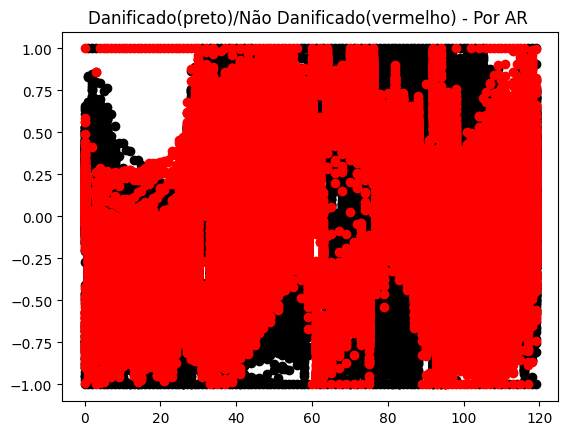

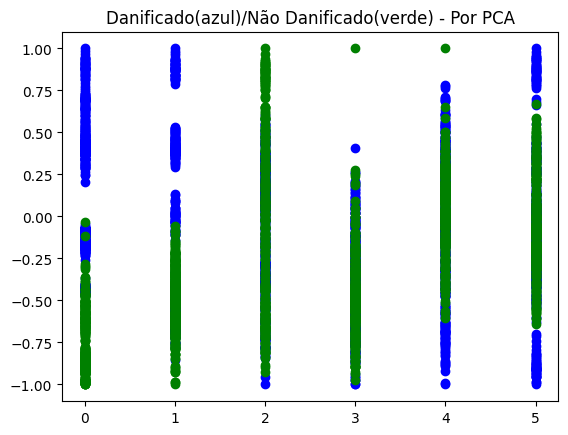

In [120]:


Y1 = np.array(range(0,120))
Y2 = np.array(range(0,6))

for case in range(0,850):
  if y_bin_damaged[0,case]==0:
    color_name = 'Black'
  else:
    color_name = 'red'
    plt.title('Danificado(preto)/Não Danificado(vermelho) - Por AR ')
  plt.scatter(Y1,X1_norm[case,:], color = color_name)
plt.show()

for case in range(0,850):
  if y_bin_damaged[0,case]==0:
    color_name = 'blue'
  else:
    color_name = 'green'
    plt.title('Danificado(azul)/Não Danificado(verde) - Por PCA')
  plt.scatter(Y2,X2_norm[case,:], color = color_name)

plt.show()


In [129]:
from sklearn.linear_model import LogisticRegression

softmax_AR = LogisticRegression(random_state=0,max_iter= 1000).fit(X1_norm,y)



predict_AR = softmax_AR.predict(X1_norm)
probabilidade_AR = softmax_AR.predict_proba(X1_norm)
score_AR = softmax_AR.score(X1_norm,y)



print('Z_AR', probabilidade_AR)

Z_AR [[9.63235753e-01 1.22498851e-02 5.06420022e-03 ... 6.01959122e-05
  2.09639862e-05 9.55840806e-06]
 [9.80250312e-01 7.85530759e-03 2.56678697e-03 ... 1.75917169e-05
  2.46686754e-05 4.45542874e-05]
 [9.51404433e-01 2.51188672e-02 1.28244618e-02 ... 4.40422974e-05
  1.24010952e-04 9.18978266e-05]
 ...
 [1.04180209e-05 6.00647233e-06 1.38715891e-05 ... 6.63743352e-06
  1.47870730e-03 9.78674104e-01]
 [4.80623801e-06 1.46105145e-05 1.87254000e-05 ... 1.15079267e-05
  1.35547651e-03 9.91642324e-01]
 [4.65855939e-06 5.78349356e-06 1.36211637e-05 ... 4.39305731e-06
  5.59305444e-04 9.90687685e-01]]


In [128]:
softmax_pca = LogisticRegression(random_state=0,max_iter= 1000).fit(X2_norm,y)
predict_pca = softmax_pca.predict(X2_norm)
probabilidade_pca = softmax_pca.predict_proba(X2_norm)
score_pca = softmax_pca.score(X2_norm,y)
print('Z_pca', probabilidade_pca)

Z_pca [[6.84102364e-01 9.03894904e-02 4.74655856e-02 ... 4.80877874e-04
  1.20789903e-04 3.42013035e-04]
 [8.69670574e-01 4.98457449e-02 7.14380153e-03 ... 2.23227738e-04
  3.42070208e-05 6.85677952e-05]
 [6.64974867e-01 2.05130380e-01 4.69371479e-02 ... 1.19007865e-03
  1.91207166e-04 3.50225123e-04]
 ...
 [1.09545148e-03 4.50784847e-04 6.84009403e-04 ... 7.48701987e-03
  4.50586776e-03 3.37299277e-01]
 [3.29926768e-04 6.05687519e-04 1.44521863e-03 ... 7.89475731e-03
  5.44888041e-03 6.19395660e-01]
 [2.71443883e-04 4.25308566e-04 1.14917851e-03 ... 4.02799502e-03
  2.16056977e-03 6.77569122e-01]]
